<a href="https://colab.research.google.com/github/LudovicaCi/PodcastSentimentAnalyzer/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Import


In [ ]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast.csv')

In [ ]:
print(reviews.shape[0])

5607021


In [ ]:
print(reviews.head())

                         podcast_id  \
0  52e3d2c4fab4e80a8bb75ad144671d96   
1  52e3d2c4fab4e80a8bb75ad144671d96   
2  52e3d2c4fab4e80a8bb75ad144671d96   
3  52e3d2c4fab4e80a8bb75ad144671d96   
4  52e3d2c4fab4e80a8bb75ad144671d96   

                                           title  \
0                                           Argh   
1           Miss gross overrated as interviewer.   
2                     I love Terri and Fresh Air   
3  Fresh Air subscription changes to Code Switch   
4                                 Climate change   

                                             content  rating        author_id  \
0  What the heck is this show? And why can’t I de...       1  a23655ce5565f32   
1  The Howard stern interview was horrible. I lea...       1  e5d461c5f91c8d2   
2  People get really pissy about this beautiful f...       5  806cc75442c8f3d   
3  I’ve been a subscriber to Fresh Air for over a...       4  3e1e7e8417a3e85   
4  Hello, my name is Lily Rudman and I am a fif

In [ ]:
print(reviews.columns)

Index(['podcast_id', 'title', 'content', 'rating', 'author_id', 'created_at'], dtype='object')


# Data cleaning




*   remove empty reviews, rating and date values
*   remove duplicate review contents



In [ ]:
reviews_cleaned = reviews.dropna(subset=['content', 'rating', 'created_at'])

In [ ]:
print(reviews_cleaned.shape[0])

5606998


In [ ]:
# Check for the presence of duplicate reviews based on the content of the "review_content" column
duplicates = reviews_cleaned.duplicated(subset=['content'], keep=False)

# Display the duplicate rows (True) in the original DataFrame
print(reviews_cleaned[duplicates])

                               podcast_id  \
19       52e3d2c4fab4e80a8bb75ad144671d96   
64       52e3d2c4fab4e80a8bb75ad144671d96   
65       52e3d2c4fab4e80a8bb75ad144671d96   
81       52e3d2c4fab4e80a8bb75ad144671d96   
109      52e3d2c4fab4e80a8bb75ad144671d96   
...                                   ...   
5606638  1b2c0e2339620feebb5327c049654e2a   
5606752  e6410ca408815fb254edbc95a182c3c4   
5606820  14fcc5d07459da655e3a4af116cf1d17   
5606960  2dd2b41126f3029088453a8273d582c8   
5606983  2dd2b41126f3029088453a8273d582c8   

                                         title  \
19                 Please fix subscribe button   
64                                          Ok   
65                                  Great Show   
81                                         Boo   
109                                  Fresh air   
...                                        ...   
5606638                            Fifty seven   
5606752  Inception was great: crashed & burned   
5606820  

In [ ]:
reviews_cleaned = reviews_cleaned.drop_duplicates(subset=['content'])

In [ ]:
print(reviews_cleaned.columns)

Index(['podcast_id', 'title', 'content', 'rating', 'author_id', 'created_at'], dtype='object')


In [ ]:
reviews_cleaned.head()

,podcast_id,title,content,rating,author_id,created_at
0,52e3d2c4fab4e80a8bb75ad144671d96,Argh,What the heck is this show? And why can’t I de...,1,a23655ce5565f32,2019-05-01 01:24:01+00:00
1,52e3d2c4fab4e80a8bb75ad144671d96,Miss gross overrated as interviewer.,The Howard stern interview was horrible. I lea...,1,e5d461c5f91c8d2,2019-06-07 14:25:34+00:00
2,52e3d2c4fab4e80a8bb75ad144671d96,I love Terri and Fresh Air,People get really pissy about this beautiful f...,5,806cc75442c8f3d,2019-05-15 09:42:53+00:00
3,52e3d2c4fab4e80a8bb75ad144671d96,Fresh Air subscription changes to Code Switch,I’ve been a subscriber to Fresh Air for over a...,4,3e1e7e8417a3e85,2019-05-06 02:39:10+00:00
4,52e3d2c4fab4e80a8bb75ad144671d96,Climate change,"Hello, my name is Lily Rudman and I am a fifth...",5,7c680144b582c6d,2019-04-18 00:37:51+00:00


In [ ]:
import pandas as pd
import re
import unicodedata

def preprocess_text(text):
    # Remove emoticons using regular expressions
    text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove Unicode characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Eliminate leading and trailing whitespaces
    text = text.strip()

    # Remove extra spaces
    text = ' '.join(text.split())

    return text

In [ ]:
# Apply the preprocess_text function to the 'content' attribute
reviews_cleaned['content'] = reviews_cleaned['content'].apply(preprocess_text)

# Data reduction


In [ ]:
# List of columns to keep
columns_to_keep =['content', 'rating', 'created_at']
# Remove all columns except the specified ones
reviews = reviews_cleaned[columns_to_keep]

In [ ]:
print(reviews.columns)

Index(['content', 'rating', 'created_at'], dtype='object')


In [ ]:
print(reviews.shape[0])

5430620


<ipython-input-16-fa7b10746a94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['created_at'] = pd.to_datetime(reviews['created_at'])
<ipython-input-16-fa7b10746a94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Year'] = reviews['created_at'].dt.year


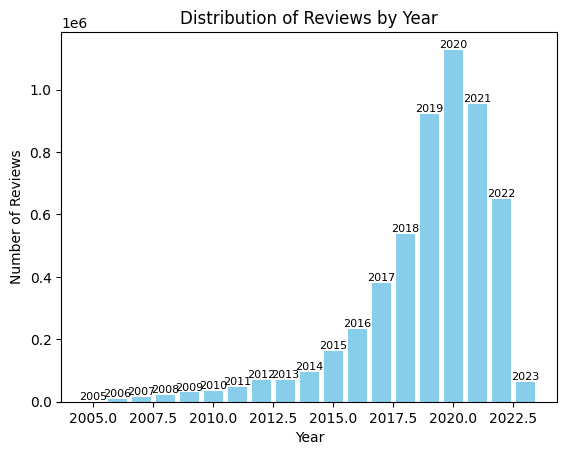

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'created_at' column to a datetime object
reviews['created_at'] = pd.to_datetime(reviews['created_at'])

# Extract the year from the 'created_at' column
reviews['Year'] = reviews['created_at'].dt.year

# Calculate the distribution of reviews per year
distribuzione_per_anno = reviews['Year'].value_counts().sort_index()

# Create a bar chart
plt.bar(distribuzione_per_anno.index, distribuzione_per_anno.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Year')

# Add year labels above the bars
for year, review_count in zip(distribuzione_per_anno.index, distribuzione_per_anno.values):
    plt.text(year, review_count + 0.1, str(year), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Save Dataset csv


In [ ]:
# Save the cleaned reviews DataFrame to a CSV file
reviews.to_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_cleaned.csv', sep=',', index=False)

In [ ]:
import pandas as pd

# Select only the reviews from the year 2020 and the columns 'content' and 'rating'
reviews_2020 = reviews.loc[reviews['Year'] == 2020, ['content', 'rating']].copy()

In [ ]:
print(reviews_2020.shape[0])

1127656


In [ ]:
# Save the reviews from the year 2020 to a CSV file
reviews_2020.to_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_2020.csv', sep=',', index=False)